<a href="https://colab.research.google.com/github/udaisharma99/Building-MachineLearning-Models/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Building Linear Regression from Scratch using Object Oriented Programming*

In this Google Colab notebook, we construct a linear regression model entirely from scratch! We'll leverage the concept of Object Oriented Programming to understand the essence of linear regression and build a model that predicts salary based on work experience.

*Understanding Linear Regression*

At its core, linear regression establishes a linear relationship between a dependent variable (what we're trying to predict) and one or more independent variables (the factors influencing the prediction).

Mathematically, this relationship can be expressed as:

Y = wX + b

Y: The dependent variable, which in our case represents salary.

X: The independent variable, representing work experience in years.

w: The weight, a coefficient that quantifies the impact of work experience on salary.

b: The bias, a constant term that accounts for any inherent difference in salary not explained by work experience.

In [19]:
import numpy as np
import pandas as pd

In [20]:
class Linear_Regression:
# Initiating the Parameters

  def __init__(self,learning_rate,iterations):

    self.learning_rate = learning_rate

    self.iterations = iterations

  def fit(self,X,Y):

    # number of training examples and number of features

    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # Implementing Gradient Descent

    for i in range(self.iterations):

      self.update_weights()



  def update_weights(self):



    Y_prediction = self.predict(self.X)



    # Calculate Gradient



    dw = - (2*(self.X.T).dot(self.Y - Y_prediction))/self.m



    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # Updating the weights

    self.w = self.w - self.learning_rate*dw

    self.b = self.b - self.learning_rate*db

  def predict( self , X ):

    return X.dot(self.w) + self.b





 The code up till now implements the structure of a linear regression model from scratch using Object Oriented Programming. During training, the model iteratively updates its weights and bias through gradient descent to minimize the difference between its predictions and the actual target values.

# *Predicting Salary using our Linear Regression Model*

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

### Data Processing

In [22]:
salary_data = pd.read_csv('/content/sample_data/salary_data.csv')

In [23]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [24]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Splitting the Features and the Target

In [25]:
X = np.asarray(salary_data.drop(columns='Salary', axis=1 ))
Y = np.asarray(salary_data['Salary'])

In [26]:
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


### Splitting the data into Training and Test Data

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

### Training the Linear Regression Model

In [28]:
model = Linear_Regression(learning_rate=0.01,iterations=1000)
model.fit(X_train,Y_train)

In [29]:
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9580.301196603597
bias =  23226.38946603212


### Predicting the Salary Value for Test Data

In [30]:
train_data_prediction = model.predict(X_train)
r2_train = metrics.r2_score(train_data_prediction,Y_train)
print('Accuracy on train data:', r2_train)

Accuracy on train data: 0.9711638114762081


In [31]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

r2_test = metrics.r2_score(test_data_prediction,Y_test)
print('Accuracy on test data:', r2_test)

[ 35680.78102162  33764.7207823   66337.74485075  58673.50389347
  91246.52796192  80708.19664565 101784.85927818  51967.29305584
  42386.99185924  88372.43760294]
Accuracy on test data: 0.8850255118354121


### Visualising the Predicted and Actual Values

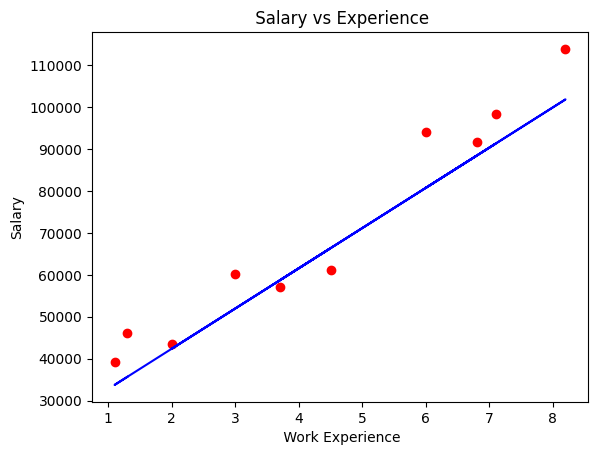

In [32]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()